Importing Library and Understanding Dataset

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [70]:
df=pd.read_csv("spam.csv",encoding = "latin1")

In [71]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2081,ham,I'm aight. Wat's happening on your side.,NaN,NaN,NaN
4360,ham,"Don't Think About \What u Have Got\"" Think Abo...",NaN,NaN,NaN
1671,ham,Glad to see your reply.,NaN,NaN,NaN
2980,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN
3515,ham,"Well, I was about to give up cos they all said...",NaN,NaN,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1. Data Cleaning

In [73]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [74]:
uni = df["Unnamed: 2"].unique()
print(uni)

[nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endof me wk offdam nevamind!We will have 2Hook up

In [75]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [76]:
df.rename(columns ={'v1':'Target','v2':'Text'},inplace =True)

In [77]:
print(df)

     Target                                               Text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [78]:
print(df['Target'].value_counts())

Target
ham     4825
spam     747
Name: count, dtype: int64


In [79]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [80]:
df["Target"]=encoder.fit_transform(df["Target"])
print(df)

      Target                                               Text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [81]:
df.duplicated().sum()

np.int64(403)

In [82]:
df.drop_duplicates(keep ='first',inplace =True)
print(df.duplicated().sum())

0


Cleaned Data

In [83]:
print(df)

      Target                                               Text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]


In [84]:
df.shape

(5169, 2)

# 2. EDA

In [85]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

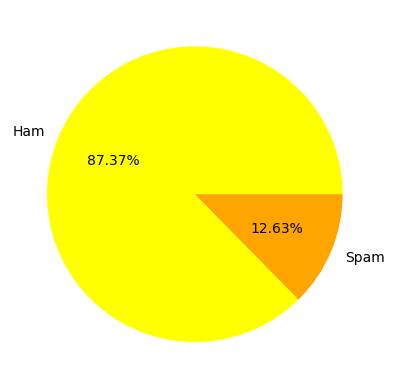

In [87]:
plt.pie(df["Target"].value_counts(),labels=["Ham","Spam"],colors =["yellow","orange"],autopct="%0.2f%%")
plt.show()

In [ ]:
#character counts
df["num_character"] = df["Text"].apply(len)
print(df["num_character"])

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_character, Length: 5169, dtype: int64


In [ ]:
#download
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#stuff
print(nltk.data.path)


['C:\\Users\\user/nltk_data', 'c:\\Users\\user\\Downloads\\project 2\\.venv\\nltk_data', 'c:\\Users\\user\\Downloads\\project 2\\.venv\\share\\nltk_data', 'c:\\Users\\user\\Downloads\\project 2\\.venv\\lib\\nltk_data', 'C:\\Users\\user\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:/Users/user/nltk_data']


In [ ]:
#stuff

# Force download to a specific known directory
nltk.download('punkt', download_dir='C:/Users/user/nltk_data')


[nltk_data] Downloading package punkt to C:/Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#word counts
df["num_word"] = df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))
print(df.head())

   Target                                               Text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_word  
0        24  
1         8  
2        37  
3        13  
4        15  


In [ ]:
#sentence count
df["num_sentence"] = df["Text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [99]:
print(df)

      Target                                               Text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_character  num_word  num_sentence  
0               111        24             2  
1                29         8             2  
2               155        37             2  
3          

In [100]:
df.describe()

,Target,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
#for ham
df[df["Target"] == 0].describe()

,Target,num_character,num_word,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [102]:
#for spam
df[df["Target"] == 1].describe()

,Target,num_character,num_word,num_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


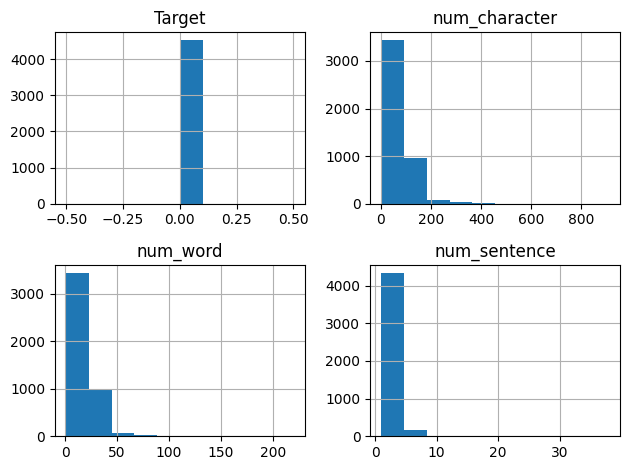

In [108]:
df[df["Target"] ==0].hist()
plt.tight_layout()

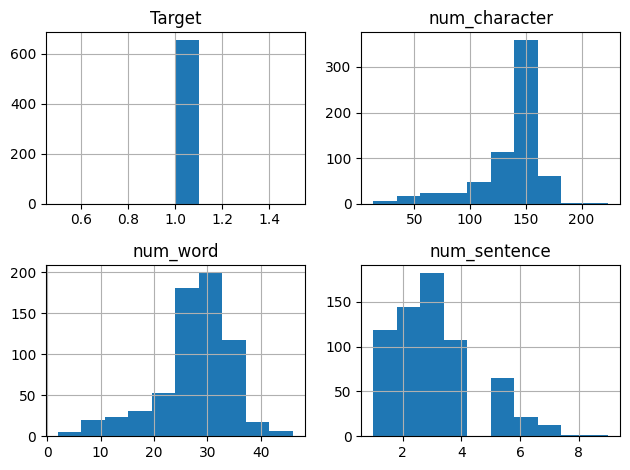

In [109]:
df[df["Target"] ==1].hist()
plt.tight_layout()

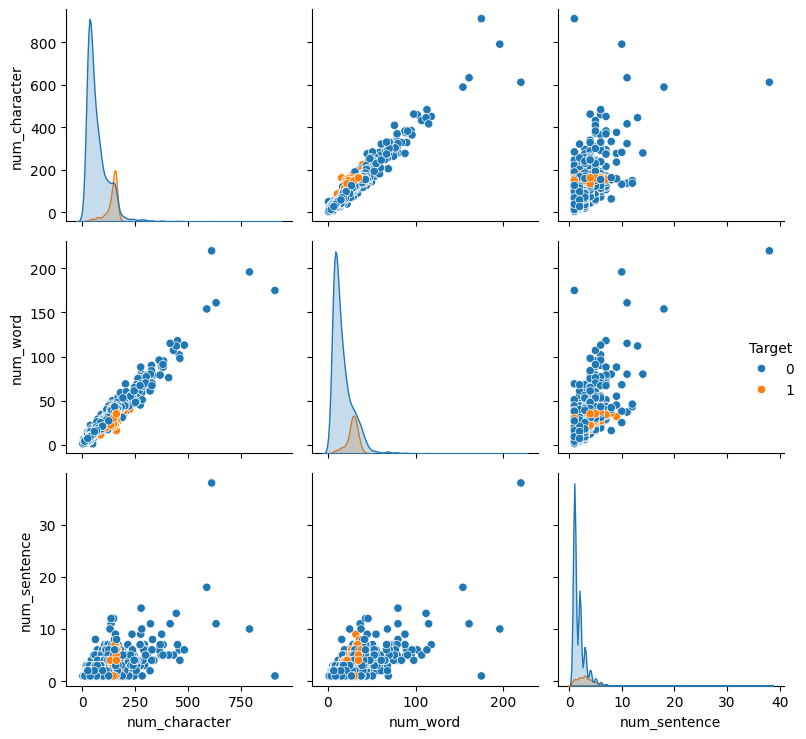

In [111]:
sns.pairplot(df,hue ="Target")
plt.tight_layout()

<Axes: >

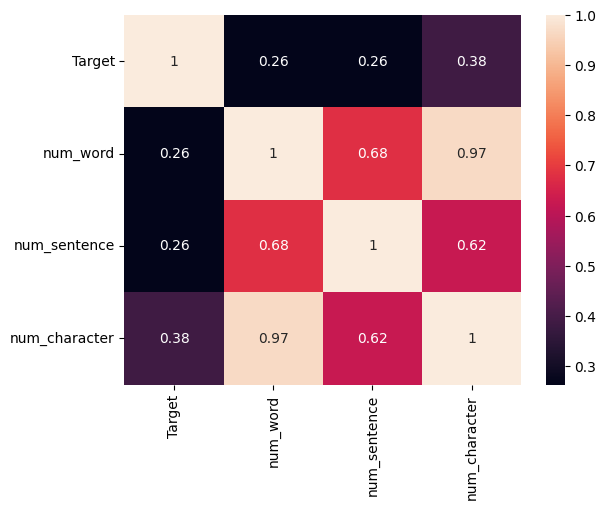

In [ ]:
#correlation
sns.heatmap(df[["Target","num_word","num_sentence","num_character"]].corr(),annot = True)

# Text Preprocessing
. Lower case
. Tokenization
. Removing Special characters
. Removing stop words and punctuation
. stemming

In [ ]:
#stuff
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
#stuff
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [119]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [ ]:
def transform_text(text):
    text = text.lower()    #lower case
    text = nltk.word_tokenize(text)   #tokenize
    
    y =[]
    for i in text:      #removing special characters
        if i.isalnum():
            y.append(i)
            
    text = y[:]   #cloaning
    y.clear()
    
    for i in text:    #removing stopwords and punctuations
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
            
    text =y[:]
    y.clear()
    
    for i in text:     #stemming
        y.append(ps.stem(i))
            
    return " ".join(y)

In [ ]:
#checking the function
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [141]:
df["Transformed_text"]=df["Text"].apply(transform_text)

In [142]:
df.head()

,Target,Text,num_character,num_word,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [144]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [147]:
#word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color ="black")


In [152]:
spam_wc = wc.generate(df[df["Target"]== 1]['Transformed_text'].str.cat(sep =" "))

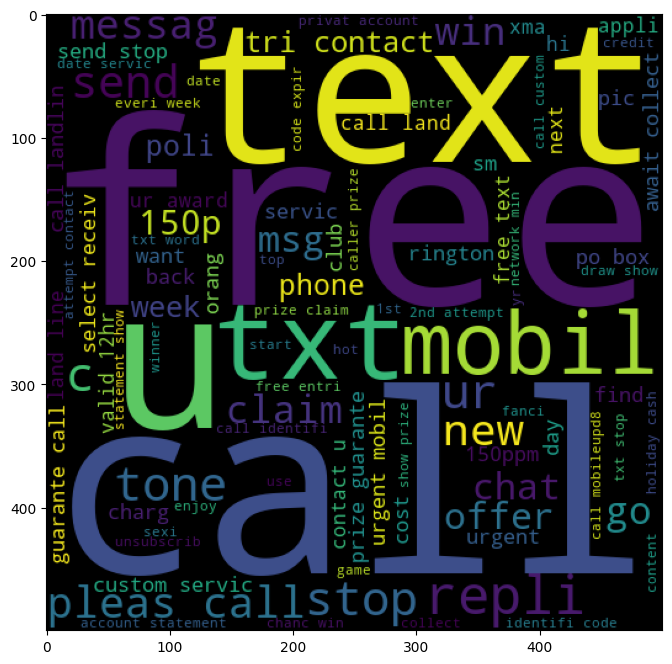

In [155]:
plt.figure(figsize =(12,8))
plt.imshow(spam_wc)

In [158]:
ham_wc = wc.generate(df[df["Target"]== 0]['Transformed_text'].str.cat(sep =" "))

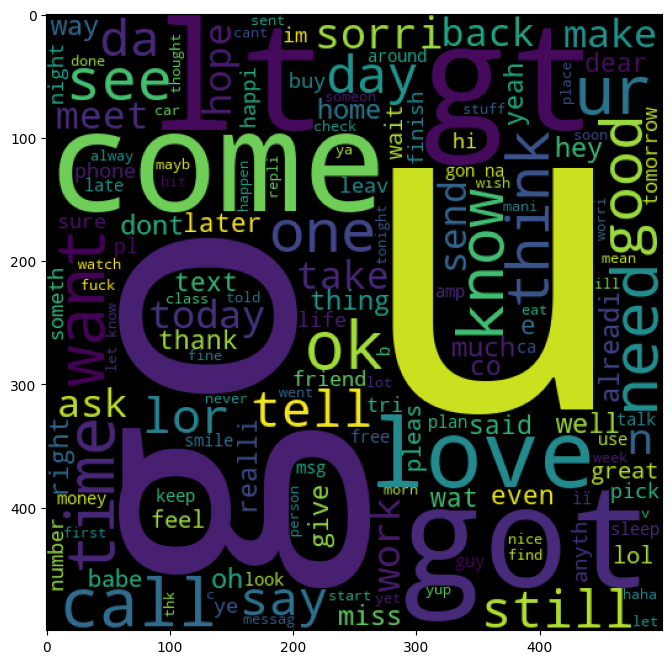

In [159]:
plt.figure(figsize =(12,8))
plt.imshow(ham_wc)

In [160]:
df.head()

,Target,Text,num_character,num_word,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [163]:
spam_corpus =[]
for msg in df[df["Target"]==1]["Transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [164]:
len(spam_corpus)

9939

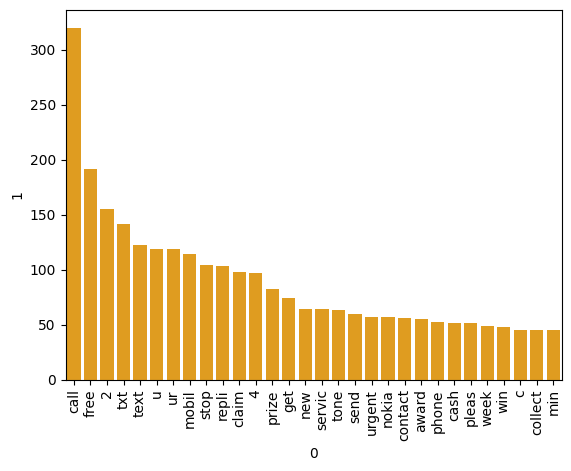

In [177]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color ='orange')
plt.xticks(rotation = "vertical")
plt.show()

In [173]:
ham_corpus =[]
for msg in df[df["Target"]==0]["Transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [174]:
len(ham_corpus)

35404

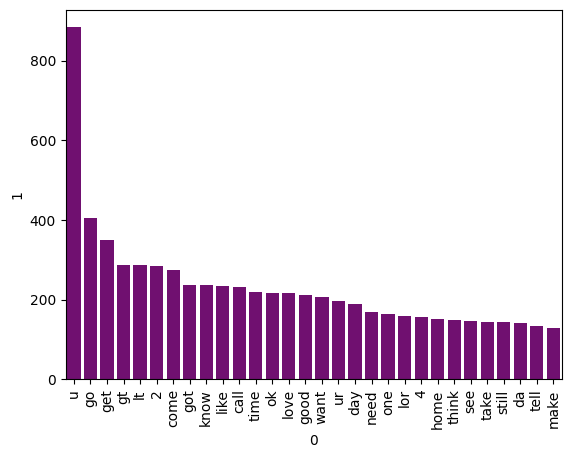

In [176]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color ="purple")
plt.xticks(rotation = "vertical")
plt.show()

# 4.Model Building

In [ ]:
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()


In [179]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [180]:
X.shape

(5169, 6708)

In [181]:
y =df["Target"].values

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =2)

In [186]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [187]:
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [188]:
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print(precision_score(y_test,y_pred_2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [189]:
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print(precision_score(y_test,y_pred_3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [224]:
#using Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf =Tfidfvectorizer()
tfidf =TfidfVectorizer(max_features=3000)   #improved hyper parameter

In [225]:
X1 = tfidf.fit_transform(df['Transformed_text']).toarray()

In [226]:
# #minmaxScaler for impored model
# #not working
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X1= scaler.fit_transform(X1)

In [227]:
y1 =df["Target"].values

In [228]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size =0.2,random_state =2)

In [229]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [230]:
gnb1.fit(X1_train,y1_train)
y1_pred_1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred_1))
print(confusion_matrix(y1_test,y1_pred_1))
print(precision_score(y1_test,y1_pred_1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [231]:
mnb1.fit(X1_train,y1_train)
y1_pred_2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred_2))
print(confusion_matrix(y1_test,y1_pred_2))
print(precision_score(y1_test,y1_pred_2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [232]:
bnb1.fit(X1_train,y1_train)
y1_pred_3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred_3))
print(confusion_matrix(y1_test,y1_pred_3))
print(precision_score(y1_test,y1_pred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [233]:
# keeping tfidf 
# mnb1

In [234]:
# step 1 > text preprocessing
# step2 > vectorize
#step 3 > algorithm apply

In [235]:
import pickle
pickle.dump(tfidf,open('vectorization.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))